# Classificação de empresas para investimento a longo prazo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
srn.set()

- Esta base de dados foi criada com as informações disponibizadas no site www.bastter.com. Para o acesso de tais informações, foi necessário comprar uma conta
- Empresas com indisponibilidade de informações ficaram com seus respectivos campos vazios
- **Atributo situação (classe)**: este atributo recebeu valores que correspondem a boa, média ou ruim. Estas posições foram retiradas do site do www.tororadar.com e do aplicativo Dinheiro do Windows 10

In [2]:
dataset = pd.read_excel('BD Completo.xlsx')
print(dataset.shape)
dataset.head()

(377, 70)


,Situação,Empresa,Segmento,Valor de M.,EV,Majoritar.,Pes. Fisicas,Categoria,LPA,LPA desconctado,...,FCO,FCI,FCF,FCT,FCL,FCI/LL,CAPEX,FCL CAPEX,CAPEX/LL,CAPEX/FCO
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,"Brasiliana Participaçoes (98,26%)",15969.0,alerta,0.57,0.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,NaN,"Aes Holdings Brasil ltda. (61,57%)",18681.0,dividendos,0.18,0.18,...,836.0,-126.0,-728.0,-18.0,710.0,0.68,-139.0,696.0,26.0,17.0
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,contour global do brasil participações ltda (9...,1898.0,alerta,0.16,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,"neoenergia s.a (87,84)",8.0,alerta,0.21,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,"admistradora fortaliza ltda (89,14%)",11290.0,crescimento moderado,0.60,0.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(dataset.info())
dataset.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 70 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Situação             377 non-null    object 
 1   Empresa              377 non-null    object 
 2   Segmento             374 non-null    object 
 3   Valor de M.          319 non-null    float64
 4   EV                   285 non-null    float64
 5   Majoritar.           361 non-null    object 
 6   Pes. Fisicas         358 non-null    float64
 7   Categoria            348 non-null    object 
 8   LPA                  336 non-null    float64
 9   LPA desconctado      317 non-null    float64
 10  VPA                  339 non-null    float64
 11  P/L                  316 non-null    float64
 12  P/L descontado       311 non-null    float64
 13  EV/EBITDA            132 non-null    float64
 14  P/VPA                313 non-null    float64
 15  DPA                  141 non-null    flo

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Situação,377,3,ruim,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Empresa,377,377,aes elpa s.a,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segmento,374,104,energia eletrica,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valor de M.,319.0,NaN,NaN,NaN,8596999442.269592,28352126872.385899,67506.0,141573508.5,878332957.0,5117960217.5,286689305243.0
EV,285.0,NaN,NaN,NaN,10217755714.421053,37948621223.278305,-26236953.0,285766537.0,1593725150.0,6411987332.0,499873636283.0
...,...,...,...,...,...,...,...,...,...,...,...
FCI/LL,135.0,NaN,NaN,NaN,272.71163,674.434183,0.68,55.0,145.0,277.0,7073.0
CAPEX,136.0,NaN,NaN,NaN,-1339.882353,6747.600243,-74622.0,-717.5,-209.5,-51.75,1350.0
FCL CAPEX,138.0,NaN,NaN,NaN,428.876812,1450.638175,-805.0,-22.0,82.5,373.25,10943.0
CAPEX/LL,135.0,NaN,NaN,NaN,235.848,586.035858,0.0,33.0,95.0,184.0,5473.0


In [4]:
dataset['Situação'].value_counts()

ruim     189
boa       99
medio     89
Name: Situação, dtype: int64

## Tratamento dados faltantes

In [5]:
#pd.set_option('max_rows', None)
dataset.isnull().sum()

Situação         0
Empresa          0
Segmento         3
Valor de M.     58
EV              92
              ... 
FCI/LL         242
CAPEX          241
FCL CAPEX      239
CAPEX/LL       242
CAPEX/FCO      241
Length: 70, dtype: int64

Alguns atibutos serão retirados do dataset.

In [6]:
dataset.drop(labels = ['EV/EBITDA', 'DPA', 'Dividend Yield', 'Payout', 'Luc. Liq * NR', 
                      'Resultado Bruto', 'Margem Bruta', 'EBIT', 'D&A', 'EBITDA', 
                      'Margem EBITDA', 'Res. Financeiro', 'ROA', 'SSS', 'RIF', 
                      'Margem Bancaria', 'Indc. Eficiencia', 'Indc. Basileia', 'PDD',
                      'PDD/LL', 'Equity Multi.', 'Div Liquida/EBITDA', 'Indice de Cobertura',
                      'Patri. Liquido', 'Despesas com juros', 'Custo % da divida', 'IPL', 'FCO', 'FCI',
                      'FCF', 'FCT', 'FCL', 'FCI/LL', 'CAPEX', 'FCL CAPEX', 'CAPEX/LL', 'CAPEX/FCO', 
                      'Majoritar.'],
             axis = 1, inplace = True)

In [8]:
print(dataset.shape)
dataset.head()

(377, 32)


,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,...,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.0,alerta,0.57,0.56,36.03,...,0.86,49.00,11.0,3.94,4610.0,4508.0,545.0,1.02,0.12,102.0
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,NaN,18681.0,dividendos,0.18,0.18,0.80,...,1.72,58.00,15.0,2.40,776.0,828.0,583.0,0.94,0.70,-52.0
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,1898.0,alerta,0.16,0.15,2.07,...,NaN,NaN,NaN,1.24,12.0,8.0,9.0,1.50,1.13,4.0
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,8.0,alerta,0.21,0.20,1.23,...,0.04,5.25,23.0,1.15,74.0,7.0,42.0,10.57,6.00,67.0
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,11290.0,crescimento moderado,0.60,0.60,10.42,...,0.25,NaN,NaN,1.01,6.0,6.0,3.0,1.00,0.50,0.0


In [9]:
dataset.isnull().sum()

Situação             0
Empresa              0
Segmento             3
Valor de M.         58
EV                  92
Pes. Fisicas        19
Categoria           29
LPA                 41
LPA desconctado     60
VPA                 38
P/L                 61
P/L descontado      66
P/VPA               64
Margem Segurança    56
Rec. Liquida        51
Luc. Liquido        52
Margem Liquida      59
ROE                 49
Patri. Liquido.1    33
Caixa               41
Divida bruta        54
Divida Liquida      36
Divida Bruta/PL     81
EF                  66
ECP                 67
EM                  83
At. Circulante      60
Pas. Circulante     60
Caixa.1             60
Liq. Corrente       60
Liq. Imediata       61
Capital de giro     61
dtype: int64

Alguns atributos serão preenchidos com a média

In [10]:
dataset.fillna(dataset.mean(), inplace=True)
dataset.isnull().sum()

<ipython-input-10-805df83fa7b6>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)


Situação             0
Empresa              0
Segmento             3
Valor de M.          0
EV                   0
Pes. Fisicas         0
Categoria           29
LPA                  0
LPA desconctado      0
VPA                  0
P/L                  0
P/L descontado       0
P/VPA                0
Margem Segurança     0
Rec. Liquida         0
Luc. Liquido         0
Margem Liquida       0
ROE                  0
Patri. Liquido.1     0
Caixa                0
Divida bruta         0
Divida Liquida       0
Divida Bruta/PL      0
EF                   0
ECP                  0
EM                   0
At. Circulante       0
Pas. Circulante      0
Caixa.1              0
Liq. Corrente        0
Liq. Imediata        0
Capital de giro      0
dtype: int64

Para a categoria, será retirado os registros com valores faltantes

In [12]:
dataset.dropna(inplace=True)
dataset.isnull().sum().sum()  # não sobrou nada

0

### Visualização e exploração

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 376
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Situação          347 non-null    object 
 1   Empresa           347 non-null    object 
 2   Segmento          347 non-null    object 
 3   Valor de M.       347 non-null    float64
 4   EV                347 non-null    float64
 5   Pes. Fisicas      347 non-null    float64
 6   Categoria         347 non-null    object 
 7   LPA               347 non-null    float64
 8   LPA desconctado   347 non-null    float64
 9   VPA               347 non-null    float64
 10  P/L               347 non-null    float64
 11  P/L descontado    347 non-null    float64
 12  P/VPA             347 non-null    float64
 13  Margem Segurança  347 non-null    float64
 14  Rec. Liquida      347 non-null    float64
 15  Luc. Liquido      347 non-null    float64
 16  Margem Liquida    347 non-null    float64
 1

#### Situação

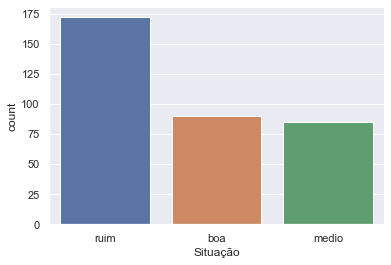

In [14]:
srn.countplot(x=dataset['Situação']);

In [20]:
dataset['Situação'].value_counts()

ruim     172
boa       90
medio     85
Name: Situação, dtype: int64

#### Segmento

In [22]:
dataset['Segmento'].value_counts().head(10)

energia eletrica                     40
bancos                               27
edificações                          17
fios e tecidos                       16
outros                               13
holdings diversificadas              11
exploração de imoveis                10
tecidos, vestuarios e calçados        7
telecomunicações                      6
exploração, refino e distribuição     6
Name: Segmento, dtype: int64

In [24]:
#np.unique(dataset['Segmento'])

Vemos que temos segmentos parecidos ou iguais que podem ser agrupados de outra forma!

In [26]:
def corrige_segmento(texto):
  segmento = ''
  if texto == 'acessórios':
    segmento = 'acessorios'
  elif texto == 'agriculltura':
    segmento = 'agricultura'
  elif texto == 'alimentos diversos':
    segmento = 'alimentos'
  elif texto == 'eletrodomésticos':
    segmento = 'eletrodomesticos'
  elif texto == 'equipamentos e servicos':
    segmento = 'equipamentos'
  elif texto == 'mateial rodoviario':
    segmento = 'material rodoviario'
  elif texto == 'ser med hospit analises e diagnosticos' or texto == 'serv med hospit analises e disgnosticos' or texto == 'serv.med.hospit.analises e diagnosticos':
    segmento = 'hospitalar'
  elif texto == 'serviços de apoio e armazenamento':
    segmento = 'serviços de apoio e armazenagem'
  elif texto == 'serviços diversos s.a ctax':
    segmento = 'serviços diversos'
  elif texto == 'siderurgia':
    segmento = 'siderurgica'
  elif texto == 'soc. Credito e financiamento' or texto == 'soc credito e financiamento':
    segmento = 'credito'
  elif texto == 'tansporte aereo':
    segmento = 'transporte aereo'
  else:
    segmento = texto  

  return segmento

In [27]:
dataset['Segmento'] = dataset['Segmento'].apply(corrige_segmento)
dataset['Segmento'].value_counts()

energia eletrica          40
bancos                    27
edificações               17
fios e tecidos            16
outros                    13
                          ..
material ferroviario       1
vestuario                  1
corretoras de seguros      1
minerais não metalicos     1
compressores e outros      1
Name: Segmento, Length: 85, dtype: int64

#### Categoria

In [28]:
dataset['Categoria'].value_counts()  # tem que corrigir crescimento

alerta                      243
crescimento moderado         48
dividendos                   36
crescimento                  17
dividendos + crescimento      2
crescimento                   1
Name: Categoria, dtype: int64

In [30]:
def corrige_categoria(texto):
    categoria = ''
    if texto == 'crescimento ':
        categoria = 'crescimento'
    else:
        categoria = texto
    
    return categoria

In [31]:
dataset['Categoria'] = dataset['Categoria'].apply(corrige_categoria)
dataset['Categoria'].value_counts()

alerta                      243
crescimento moderado         48
dividendos                   36
crescimento                  18
dividendos + crescimento      2
Name: Categoria, dtype: int64

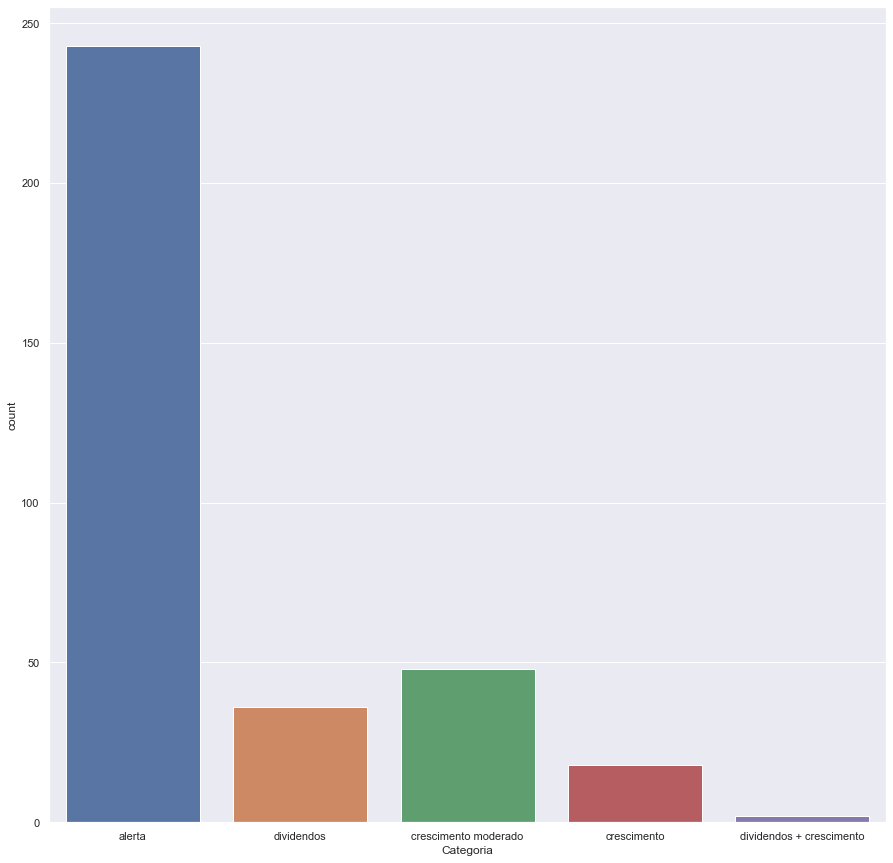

In [33]:
plt.figure(figsize=(15,15))
srn.countplot(x=dataset['Categoria']);

#### Dados numéricos

In [35]:
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Situação,347,3,ruim,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Empresa,347,347,aes elpa s.a,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segmento,347,85,energia eletrica,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valor de M.,347.0,NaN,NaN,NaN,8803913296.054127,27154374265.057571,67506.0,165180424.0,1362356687.0,8596999442.269592,286689305243.0
EV,347.0,NaN,NaN,NaN,10451643848.510538,34352437362.081059,-26236953.0,371696047.0,3583574107.0,10217755714.421053,499873636283.0
Pes. Fisicas,347.0,NaN,NaN,NaN,22260.63597,130989.249504,1.0,580.5,1773.0,6354.5,1803724.0
Categoria,347,5,alerta,243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LPA,347.0,NaN,NaN,NaN,-7.862101,65.493749,-806.67,-2.03,0.13,1.185,200.66
LPA desconctado,347.0,NaN,NaN,NaN,-9.044851,64.45679,-806.66,-5.68,0.086,1.06,160.78
VPA,347.0,NaN,NaN,NaN,38.573753,842.780784,-3804.86,2.695,9.47,22.565,14896.47


EX: Empresa com menor lucro por ação

In [36]:
dataset[dataset['LPA'] == dataset['LPA'].min()]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,...,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
322,ruim,siderurgica j l aliperti s.a apti,holdings diversificadas,5950400.0,37950400.0,157.0,alerta,-806.67,-806.66,14896.47,...,0.26,14.0,35.0,1.55,73.0,17.0,15.0,4.29,0.88,56.0


In [38]:
dataset[dataset['LPA desconctado'] == dataset['LPA desconctado'].min()]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,...,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
322,ruim,siderurgica j l aliperti s.a apti,holdings diversificadas,5950400.0,37950400.0,157.0,alerta,-806.67,-806.66,14896.47,...,0.26,14.0,35.0,1.55,73.0,17.0,15.0,4.29,0.88,56.0


EX: Empresa com maior lucro

In [40]:
dataset[dataset['LPA'] == dataset['LPA'].max()]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,...,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
254,ruim,minasmaquinas s.a mmaq,material de transporte,8.596999e+09,1.021776e+10,1055.0,alerta,200.66,-8.723009,1605.35,...,0.31,18.0,100.0,1.49,130.0,51.0,47.0,2.55,0.92,79.0


In [39]:
dataset[dataset['LPA desconctado'] == dataset['LPA desconctado'].max()]

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA,LPA desconctado,VPA,...,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
194,ruim,hercules s.a fabrica de talheres heta,utensilios domesticos,2121596.0,307121596.0,592.0,alerta,160.78,160.78,-656.86,...,1.720811,-360.0,25.0,62.646871,1.0,8.0,0.0,0.13,0.0,-7.0


<ipython-input-42-a2f8583569eb>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset.hist(ax=eixo);


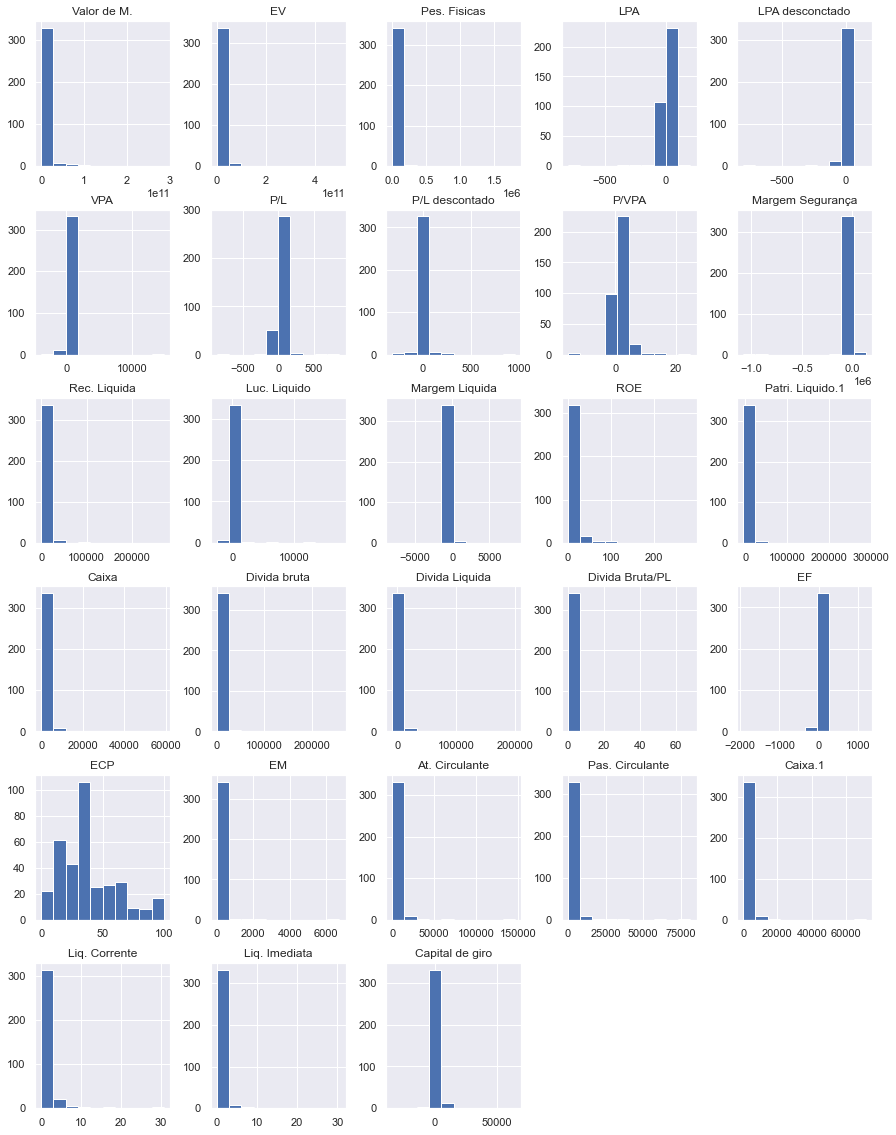

In [42]:
figura = plt.figure(figsize=(15,20))
eixo = figura.gca()
dataset.hist(ax=eixo);

### Correlação entre atributos

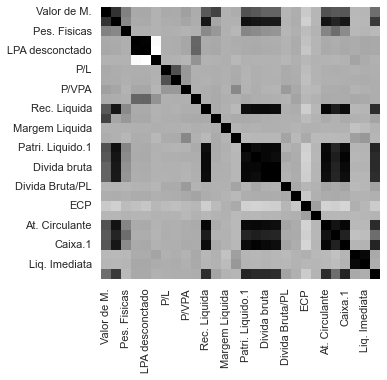

In [49]:
plt.figure(figsize=(5,5))
srn.heatmap(dataset.corr(), annot=False, cbar=False, cmap='binary');

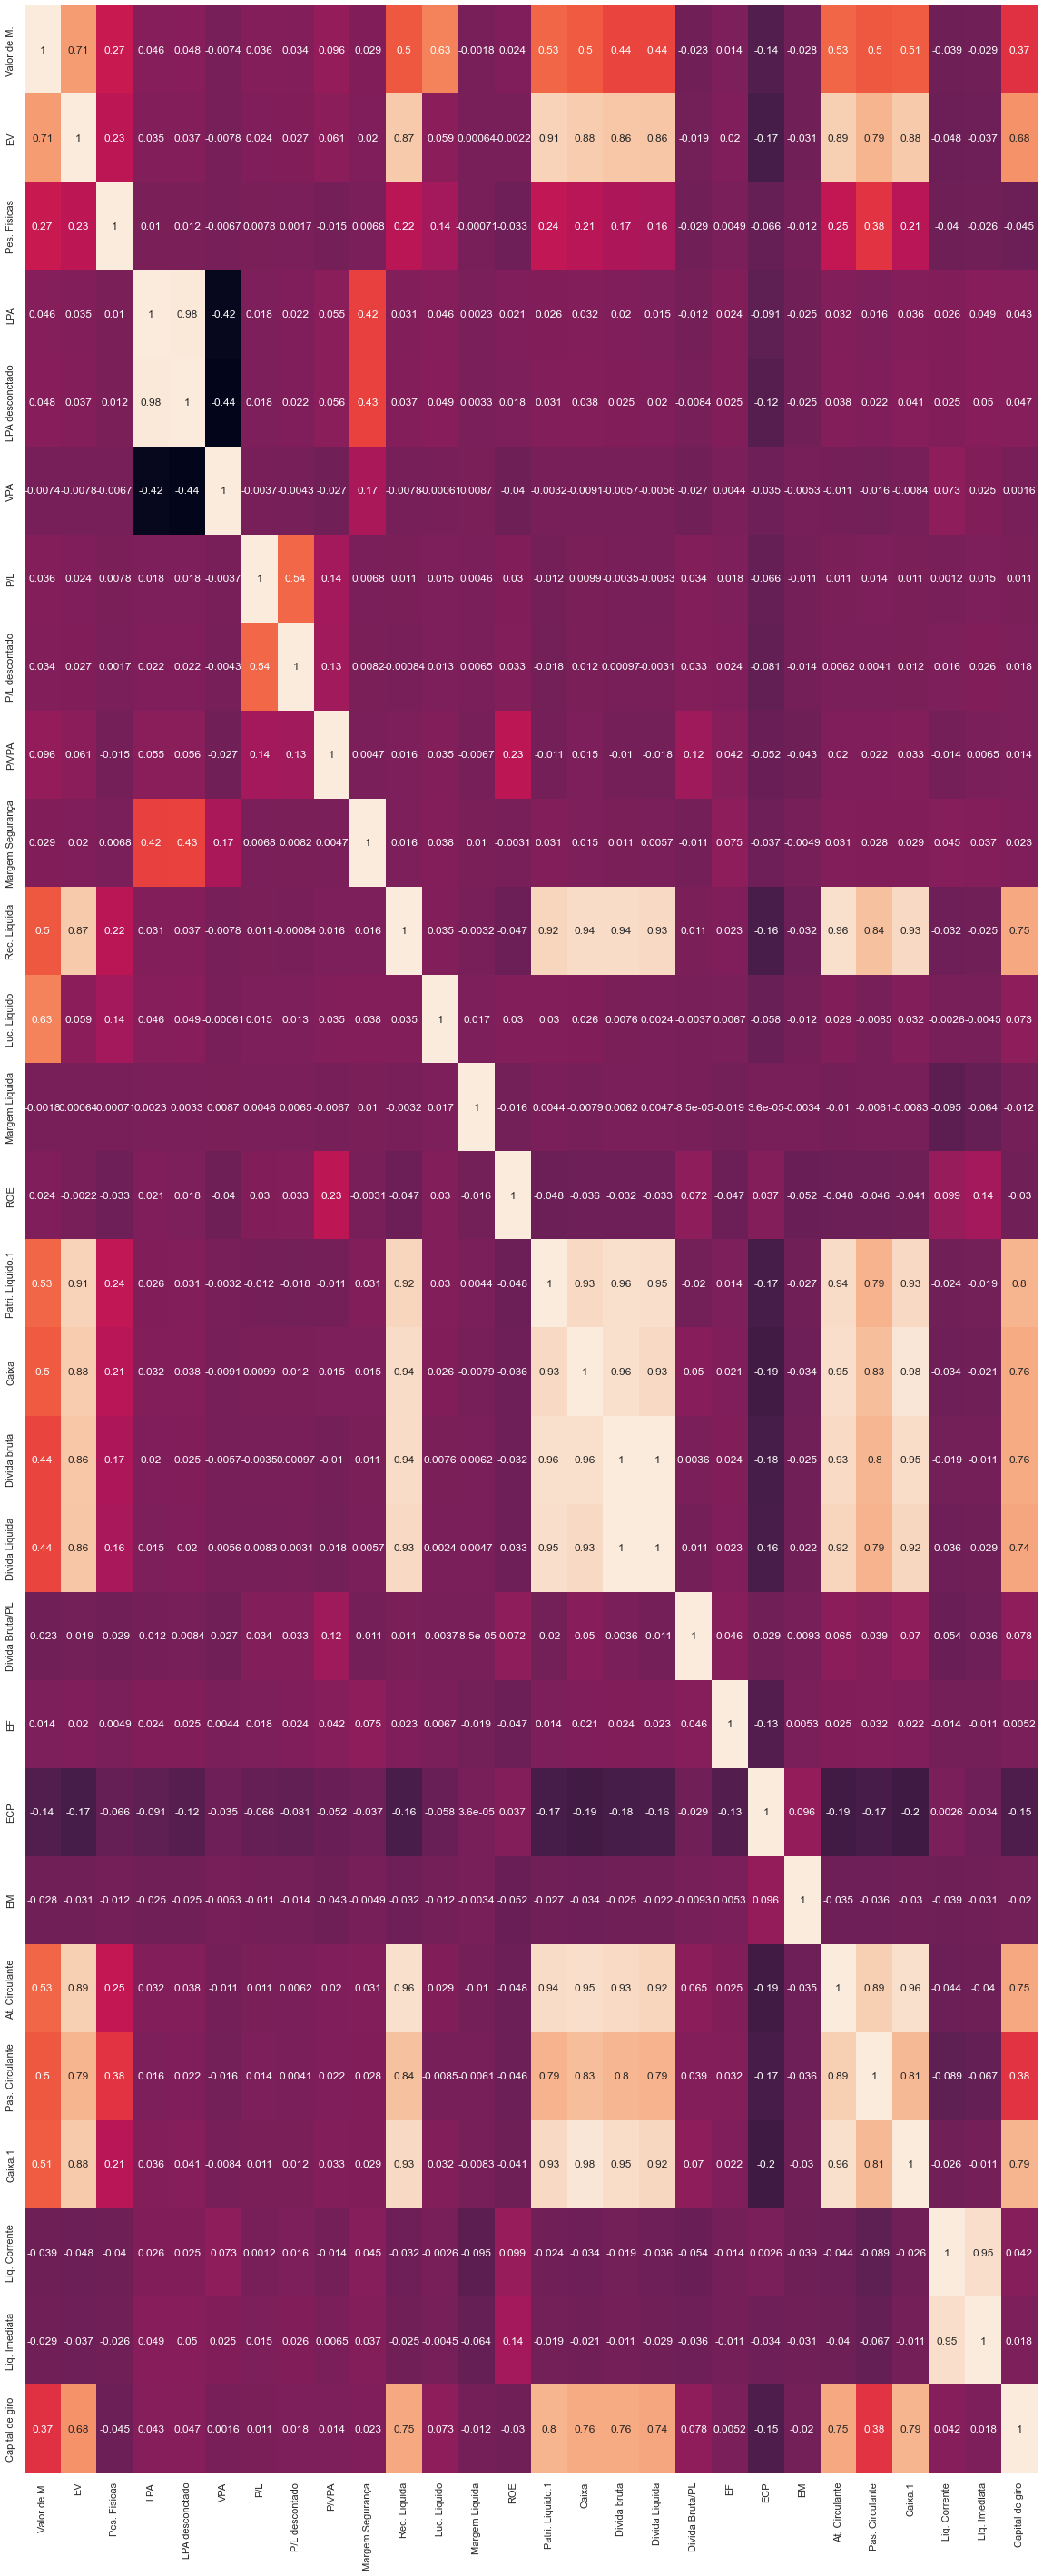

In [44]:
plt.figure(figsize=(20,50))
srn.heatmap(dataset.corr(), annot=True, cbar=False);

### Variável dummy

### Normalização

### Validação cruzada

### Redes neurais artificiais

### Avaliação dos algorítmos